In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 16s 0us/step


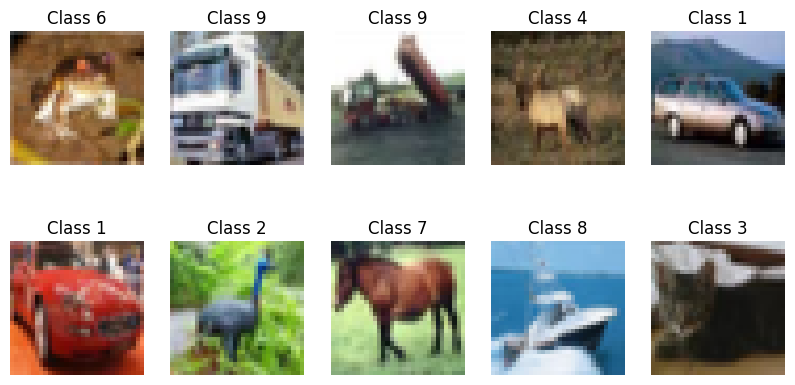

In [ ]:
# Display a few preprocessed images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

In [ ]:
# Define ResNet-18 model
def resnet_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    # Add 1x1 Convolution to shortcut for matching dimensions
    if x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add shortcut to the output
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

input_layer = Input(shape=(32, 32, 3))
x = Conv2D(64, 7, strides=2, padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = AveragePooling2D(3, strides=2, padding='same')(x)

In [ ]:
# ResNet blocks
num_blocks_list = [2, 2, 2, 2]
num_filters = 64
for i, num_blocks in enumerate(num_blocks_list):
    for j in range(num_blocks):
        if i > 0 and j == 0:
            stride = 2
        else:
            stride = 1
        x = resnet_block(x, filters=num_filters, stride=stride)
    num_filters *= 2

x = AveragePooling2D(1)(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 1379s 4s/step - loss: 1.5516 - accuracy: 0.4524 - val_loss: 1.5682 - val_accuracy: 0.4339
Epoch 2/10
391/391 [==============================] - 1368s 3s/step - loss: 1.1912 - accuracy: 0.5773 - val_loss: 2.4891 - val_accuracy: 0.3105
Epoch 3/10
391/391 [==============================] - 1358s 3s/step - loss: 0.9960 - accuracy: 0.6510 - val_loss: 2.1044 - val_accuracy: 0.3814
Epoch 4/10
391/391 [==============================] - 1368s 3s/step - loss: 0.8458 - accuracy: 0.7038 - val_loss: 0.9807 - val_accuracy: 0.6565
Epoch 5/10
391/391 [==============================] - 1338s 3s/step - loss: 0.7294 - accuracy: 0.7472 - val_loss: 1.4120 - val_accuracy: 0.5399
Epoch 6/10
391/391 [==============================] - 1330s 3s/step - loss: 0.6334 - accuracy: 0.7782 - val_loss: 1.3991 - val_accuracy: 0.5537
Epoch 7/10
391/391 [==============================] - 1332s 3s/step - loss: 0.5333 - accuracy: 0.8128 - val_loss: 1.2021 - val_accuracy:

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 22s 71ms/step - loss: 1.0931 - accuracy: 0.6937
Test accuracy: 69.37%


In [ ]:
# Predict labels for a few test images
num_images_to_display = 5
test_images = test_images[:10]
predicted_labels = model.predict(test_images)

1/1 [==============================] - 1s 617ms/step


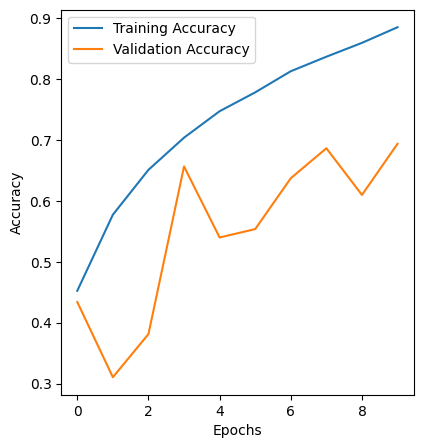

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

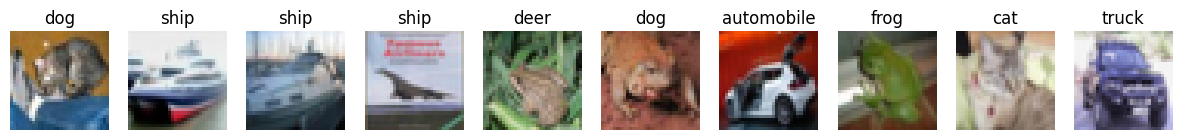

1/1 [==============================] - 0s 48ms/step


<ipython-input-12-10249c9f4681>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


1/1 [==============================] - 0s 100ms/step


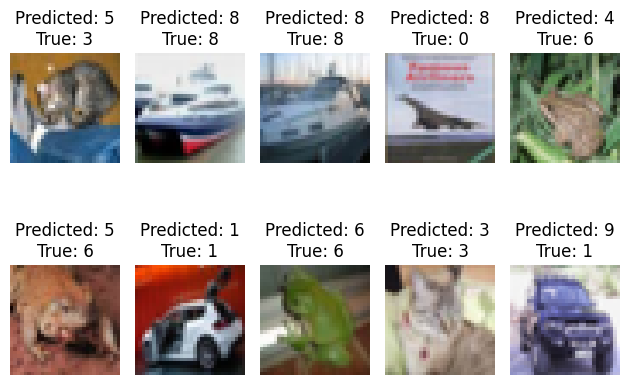

In [ ]:
# Display a few preprocessed test images with predicted labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    predicted_class_index = np.argmax(predicted_labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis('off')

plt.show()

plt.subplot(1, 2, 2)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(model.predict(np.expand_dims(test_images[i], axis=0)))
    true_label = np.argmax(test_labels[i])
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()